<c><h2>The temperature problem:</h2></c>

A cabin in the snow has all its walls at 0 degrees Celsius,
except for a radiator at 100 degrees Celsius on one wall.
What is the temperature at each point inside the cabin?

For this model, we take the cabin to be 2-dimensional and square, and we discretize the interior
of the cabin into a grid of k by k points. The temperature at any given point is (approximately)
the average of the temperatures at the four neighboring points. 
This fact gives us one linear equation at each point, for a total of ndim = k<sup>2</sup> linear equations
in the k<sup>2</sup> variables representing the temperatures at each point.

We express this system of ndim linear equations in matrix form as A * t = b, where A is an ndim-by-ndim
matrix (most of whose entries are zero), b is a right-hand size vector of ndim entries that among other
things encodes the boundary temperatures, and the unknown vector t is the temperature at each interior point.

This code sets up the matrix A and the vector b, uses scipy to solve the linear system for t, and 
uses matplotlib to visualize t.

In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk

In [2]:
def make_A(k):
    """Create the matrix for the temperature problem on a k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
    Outputs:
      A: the sparse k**2-by-k**2 matrix representing the finite difference approximation to Poisson's equation.
    """
    # First make a list with one triple (row, column, value) for each nonzero element of A
    triples = []
    for i in range(k):
        for j in range(k):
            # what row of the matrix is grid point (i,j)?
            row = j + i*k
            # the diagonal element in this row
            triples.append((row, row, 4.0))
            # connect to left grid neighbor
            if j > 0:
                triples.append((row, row - 1, -1.0))
            # ... right neighbor
            if j < k - 1:
                triples.append((row, row + 1, -1.0))
            # ... neighbor above
            if i > 0:
                triples.append((row, row - k, -1.0))
            # ... neighbor below
            if i < k - 1:
                triples.append((row, row + k, -1.0))
    
    # Finally convert the list of triples to a scipy sparse matrix
    ndim = k*k
    rownum = [t[0] for t in triples]
    colnum = [t[1] for t in triples]
    values = [t[2] for t in triples]
    A = sparse.csr_matrix((values, (rownum, colnum)), shape = (ndim, ndim))
    
    return A 

In [3]:
def make_b(k, top = 0, bottom = 0, left = 0, right = 0):
    """Create the right-hand side for the temperature problem on a k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
      top: list of k values for top boundary (optional, defaults to 0)
      bottom: list of k values for bottom boundary (optional, defaults to 0)
      left: list of k values for top boundary (optional, defaults to 0)
      right: list of k values for top boundary (optional, defaults to 0)
    Outputs:
      b: the k**2 element vector (as a numpy array) for the rhs of the Poisson equation with given boundary conditions
    """
    # Start with a vector of zeros
    ndim = k*k
    b = np.zeros(shape = ndim)
    
    # Fill in the four boundaries as appropriate
    b[0        : k       ] += top
    b[ndim - k : ndim    ] += bottom
    b[0        : ndim : k] += left
    b[k-1      : ndim : k] += right
    
    return b
    

In [4]:
def radiator(k, width = .3, temperature = 100.):
    """Create one wall with a radiator
    Parameters: 
      k: number of grid points in each dimension; length of the wall.
      width: width of the radiator as a fraction of length of the wall (defaults to 0.2)
      temperature: temperature of the radiator (defaults to 100)
    Outputs:
      wall: the k element vector (as a numpy array) for the boundary conditions at the wall
    """
    rad_start = int(k * (0.5 - width/2))
    rad_end = int(k * (0.5 + width/2))
    wall = np.zeros(k)
    wall[rad_start : rad_end] = temperature
    
    return wall


In [5]:
wave = np.sin( np.array(range(100)) / 100 * 2 * np.pi)

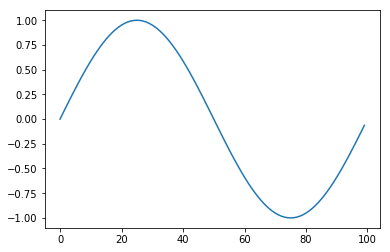

In [6]:
plt.plot(wave)

In [7]:
k = 100
rad_wall = radiator(k)
A = make_A(k)
b = make_b(k, right = rad_wall)
# b = make_b(k, right = wave, bottom = wave, top = wave)

In [8]:
t = spla.spsolve(A,b)
T = t.reshape(k,k)


In [9]:
T.shape

(100, 100)

In [10]:
%matplotlib tk
plt.figure()
plt.imshow(T, cmap=cm.hot)

In [11]:
X, Y = np.meshgrid(range(k), range(k))
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax = fig.gca()
ax.plot_surface(X, Y, T, cmap=cm.hot)